In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [74]:
# create a sample DataFrame
df = pd.read_csv("dataframe_finale.csv", sep=";")
print(df["Date"].nunique())
df

21


,Title,Artist,Rank,Last Week,Peak Positon,Weeks on charts,Date,Genre,Producers,Writers,Distributor
0,Shut Down,BLACKPINK,1,-,1,1,2022-10-01,"Pop, K-Pop (케이팝), Modern Classical, Orchestral...",Teddy Park & 24,"Teddy Park, Danny Chung & Vince (KOR)",None
1,Pink Venom,BLACKPINK,2,4,1,5,2022-10-01,"Pop, Korean, Hip-Hop, K-Pop (케이팝), Girl Group,...","Teddy Park, 24, R.Tee & IDO (KOR)","Teddy Park, , R.Tee, Danny Chung & IDO (KOR)",None
2,I'm Good (Blue),David Guetta & Bebe Rexha,3,2,2,4,2022-10-01,"Pop, Rap, Hip-Hop, Cloud Rap, Trap, Conscious ...",T-Minus & Nikhil Seetharam,"Kendrick Lamar, T-Minus & Nikhil Seetharam",Universal Music Group
3,As It Was,Harry Styles,4,1,1,25,2022-10-01,"Rock, Pop, Electronic, UK Pop, Dance Rock, Fun...",Tyler Johnson & Kid Harpoon,"Kid Harpoon, Tyler Johnson & Harry Styles",Sony Music Entertainment
4,Me Porto Bonito,Bad Bunny & Chencho Corleone,5,3,2,20,2022-10-01,"Pop, Reggaetón, Puerto Rico, En Español, Latin...","Subelo NEO, Lennex, MAG & La Paciencia",Chencho Corleone & Bad Bunny,The Orchard
...,...,...,...,...,...,...,...,...,...,...,...
4195,In The End,Linkin Park,196,193,163,12,2023-02-12,"Rap, Rock, Hard Rock, Alternative Metal, Rap M...",Don Gilmore,"Mr. Hahn, Rob Bourdon, Mike Shinoda, Chester B...",None
4196,Ferrari,James Hype & Miggy Dela Rosa,197,174,25,31,2023-02-12,"Pop, Deep House, House, Alternative Dance, Ele...",James Hype,"James Hype, Miggy Dela Rosa, Josh Grimmett, Jo...",None
4197,Just The Way You Are,Bruno Mars,198,-,162,12,2023-02-12,"R&B, Pop, Alternative R&B, Piano, Ballad, Adul...",Needlz & The Smeezingtons,"Philip Lawrence, Ari Levine, Needlz, Saint Cas...",None
4198,Call Out My Name,The Weeknd,199,181,97,31,2023-02-12,"Pop, R&B, Singer-Songwriter, Downtempo, Canada...",Ging,"Ging, Nicolas Jaar & The Weeknd",None


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            4200 non-null   object
 1   Artist           4200 non-null   object
 2   Rank             4200 non-null   int64 
 3   Last Week        4200 non-null   object
 4   Peak Positon     4200 non-null   int64 
 5   Weeks on charts  4200 non-null   int64 
 6   Date             4200 non-null   object
 7   Genre            4200 non-null   object
 8   Producers        4200 non-null   object
 9   Writers          4179 non-null   object
 10  Distributor      4193 non-null   object
dtypes: int64(3), object(8)
memory usage: 361.1+ KB


In [76]:
#Liste unique des genres et artistes

genres = df['Genre'].str.split(',').values.tolist()
genres_uniques = list(set([elem for sublist in genres for elem in sublist]))
Artistes = list(set(df['Artist'].values.tolist()))


In [77]:

for i in genres_uniques:

    # convert the date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # define the string to search for
    my_string = i

    # group the DataFrame by the date column and count the number of occurrences of the string in the column
    counts = df.groupby('Date')['Genre'].apply(lambda x: x.str.count(my_string).sum())

    # plot the counts over time
    fig, ax = plt.subplots()
    ax.plot(counts.index, counts.values)

    # set the x-axis label to 'Date' and y-axis label to 'Number of occurrences'
    ax.set_xlabel('Date')
    ax.set_ylabel("Nombre d'occurence dans le global 200")
    plt.title(f"Genre: {i}",)
    # rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()



In [78]:
df.head()

,Title,Artist,Rank,Last Week,Peak Positon,Weeks on charts,Date,Genre,Producers,Writers,Distributor
0,Shut Down,BLACKPINK,1,-,1,1,2022-10-01,"Pop, K-Pop (케이팝), Modern Classical, Orchestral...",Teddy Park & 24,"Teddy Park, Danny Chung & Vince (KOR)",None
1,Pink Venom,BLACKPINK,2,4,1,5,2022-10-01,"Pop, Korean, Hip-Hop, K-Pop (케이팝), Girl Group,...","Teddy Park, 24, R.Tee & IDO (KOR)","Teddy Park, , R.Tee, Danny Chung & IDO (KOR)",None
2,I'm Good (Blue),David Guetta & Bebe Rexha,3,2,2,4,2022-10-01,"Pop, Rap, Hip-Hop, Cloud Rap, Trap, Conscious ...",T-Minus & Nikhil Seetharam,"Kendrick Lamar, T-Minus & Nikhil Seetharam",Universal Music Group
3,As It Was,Harry Styles,4,1,1,25,2022-10-01,"Rock, Pop, Electronic, UK Pop, Dance Rock, Fun...",Tyler Johnson & Kid Harpoon,"Kid Harpoon, Tyler Johnson & Harry Styles",Sony Music Entertainment
4,Me Porto Bonito,Bad Bunny & Chencho Corleone,5,3,2,20,2022-10-01,"Pop, Reggaetón, Puerto Rico, En Español, Latin...","Subelo NEO, Lennex, MAG & La Paciencia",Chencho Corleone & Bad Bunny,The Orchard


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            4200 non-null   object        
 1   Artist           4200 non-null   object        
 2   Rank             4200 non-null   int64         
 3   Last Week        4200 non-null   object        
 4   Peak Positon     4200 non-null   int64         
 5   Weeks on charts  4200 non-null   int64         
 6   Date             4200 non-null   datetime64[ns]
 7   Genre            4200 non-null   object        
 8   Producers        4200 non-null   object        
 9   Writers          4179 non-null   object        
 10  Distributor      4193 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 361.1+ KB


In [80]:
print('Calvin Harris & Dua Lipa' in df['Artist'])

False


In [81]:
for i in Artistes:

    # group the DataFrame by the date column and count the number of occurrences of the string in the column
    best_rank = df[df["Artist"] == str(i)].groupby('Date')['Rank'].min().reset_index()
    
    # best_rank.plot(x="Date", y="Rank")

    # # set the x-axis label to 'Date' and y-axis label to 'Number of occurrences'
    plt.xlabel('Date')
    plt.ylabel("Rank dans le global 200")
    plt.title(f"Artist: {i}",)
    # rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()

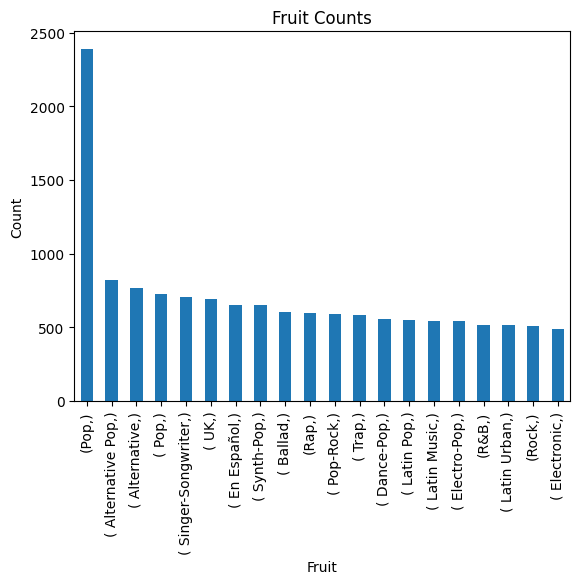

In [82]:
genres_liste =[elem for sublist in genres for elem in sublist]
genres_dataframe = pd.DataFrame({"Genres":genres_liste})
histo = genres_dataframe.value_counts()[:20]

# create a bar chart of the counts

histo.plot(kind='bar')

# set the title and axis labels
plt.title('Fruit Counts')
plt.xlabel('Fruit')
plt.ylabel('Count')

# show the plot
plt.show()
# counts = df['Genres'].apply(lambda x: x.str.count(my_string).sum())

In [83]:
print(len(genres_dataframe.value_counts()))

362
